<a href="https://colab.research.google.com/github/Denis123-commit1/AB_AA_testing/blob/master/take_from_json_for_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls "/content/drive/My Drive"

'72-IEF_001181 (1).gdoc'      HwNotePad.apk
'72-IEF_001181 (1).pdf'       investpy
'Colab Notebooks'	      lab11
 COURSERA		      OneNote
 coursera_downloader_script   pairs_trading
 foo.txt		      rec_systems_for_maga
 funnels_charts		     'Файл учета времени Козлов.gsheet'


In [3]:
!pip install investpy

In [4]:
companies = ['sber', 'yndx', 'gazp', 'mtss', 'lkoh', 'dsky']
not_stock_prices_companies = ['five', 'mail', 'tcsg', 'pogr', 'agro', 'banep', 'qiwi', 'sngsp', 'sberp','tatnp']

params = ['Всего выпущено обыкновенных акций',
       'Количество акций доступных к купле-продаже', 'Количество сотрудников',
       'Количество акционеров', 'Цена/Прибыль', 'Цена/Продажи',
       'Цена/Движение денежных средств', 'Цена/балансовая стоимость',
       'Стоимость компании', 'Стоимость компании/EBITDA',
       'Прибыль на общ. сумму активов, %', 'Доход на капитал, %',
       'Доход на инвестированный капитал, %', 'Валовая рентабельность %',
       'Операционная рентабельность %', 'Рентабельность по EBITDA %',
       'Чистая рентабельность %', 'Быстрая ликвидность',
       'Коэффициент текущей ликвидности', 'Оборачиваемость запасов',
       'Оборачиваемость активов', 'Задолженность/Активы',
       'Задолженность/Капитал', 'Долгосрочная задолж./совокупные активы', 'Mean_stock_price_with_inflation']
import pandas as pd
delta_frame = pd.DataFrame(columns = params)
def get_from_json_fund_params(name_company):
    import pandas as pd
    import os
    directory = r'/content/drive/My Drive/pairs_trading'
    files = os.listdir(directory)
    y_html_files = list(filter(lambda x: x.endswith('y.html'), files))
    #print(y_html_files)
    file_path = fr'/content/drive/My Drive/pairs_trading/{name_company.upper()}_y.html'
    # change indexes
    if file_path[38:] not in y_html_files:
        return 'Change indexes'
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_rows', None)
    from bs4 import BeautifulSoup
    with open(file_path, 'r', encoding='utf8') as f:
        soup = BeautifulSoup(f, 'lxml')
        items_date_1 = soup.find_all("div", class_="wrap-25PNPwRV")
        items_titles_1 = soup.find_all("span", class_="title-jKD0Exn- apply-overflow-tooltip")
    items_date_1_1 = []
    for item in items_date_1:
        items = item.get_text()
        items_date_1_1.append(items)
    #print(items_date_1_1)
    items_titles_1_1 = []
    for item in items_titles_1:
        items = item.get_text()
        items_titles_1_1.append(items)
    #print(len(items_titles_1_1))
    item_date = [[] for i in range(len(items_titles_1) + 1)]
    ind, num_list = 1, 0
    for i in items_date_1_1:
        item_date[num_list].append(i)
        ind += 1
        if ind % 9 == 0:
            num_list += 1
            ind = 1
    #print(item_date)
    data = pd.DataFrame(item_date[1:], columns=item_date[0], index=items_titles_1_1)
    #print(data)
    q_html_files = list(filter(lambda x: x.endswith('q.html'), files))
    file_path = fr'{name_company.upper()}_q.html'
    if file_path[0:] in q_html_files:
        data.drop(['2020', 'Текущ. цена'], axis=1, inplace=True)
    data = data.T
    for i in data.columns:
        for j in range(len(data[i])):
            if data[i][j] is not None and len(data[i][j]) > 1:
                if data[i][j][-2] == "K" or data[i][j][-2] == "B" or data[i][j][-2] == "M":
                    if data[i][j][1] == '−':
                        data[i][j] = float('-' + data[i][j][2:-2])
                    else:
                        data[i][j] = float(data[i][j][1:-2])
                    #print(type(data[i][j]))
                elif data[i][j][1] == '−':
                    data[i][j] = float('-'+data[i][j][2:-1])
                else:
                    data[i][j] = float(data[i][j][1:-1])
                #print(data[i][j])
            elif data[i][j] == '—':
                data[i][j] = None
            #print(data[i][j], len(data[i][j]), data[i][j][1:-1])
    q_html_files = list(filter(lambda x: x.endswith('q.html'), files))
    file_path = fr'/content/drive/My Drive/pairs_trading/{name_company.upper()}_q.html'
    if file_path[38:] not in q_html_files:
        import investpy
        data_stock = investpy.get_stock_historical_data(stock=name_company, country='russia', from_date='01/01/2013',
                                                        to_date='05/11/2021')
        data_stock_y = data_stock[:'20220101']
        d_years = data_stock_y.resample('Y')['Close'].mean()
        df = d_years
        # print(df)
        import calendar
        voc_mean_stock_price = {}
        for ind, i in enumerate(df.index):
            if str(i.year) in data.index and ind != len(df.index) - 1:
                # print (i)
                voc_mean_stock_price[str(i.year)] = df[ind]
            else:
                voc_mean_stock_price[data.index[-1]] = df[
                    pd.Timestamp(i.year, i.quarter * 3, calendar.monthrange(i.year, i.quarter * 3)[1])]
        #print (voc_mean_stock_price)
        #print(data)
        ser_mean_stock_price = pd.Series(voc_mean_stock_price, name='Mean_stock_price')
        data_full_with_stock_price = data.T.append(ser_mean_stock_price, ignore_index=False)
        #print (data_full_with_stock_price)
        import numpy as np
        inflation = np.array([11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 4.91, 5.32])[::-1]
        inflation = np.cumsum(inflation)[::-1]
        # print(data_full_with_stock_price.loc['Mean_stock_price'])
        stock_price_with_inflation = data_full_with_stock_price.loc['Mean_stock_price'] * (1 + inflation / 100)
        stock_price_with_inflation.name = 'Mean_stock_price_with_inflation'
        data_full_with_stock_price_with_inflation = data_full_with_stock_price.append(stock_price_with_inflation)

    else:
        with open(file_path, 'r', encoding='utf8') as f:
            soup = BeautifulSoup(f, 'lxml')
            items_date_1 = soup.find_all("div", class_="wrap-25PNPwRV")
            items_titles_1 = soup.find_all("span", class_="title-jKD0Exn- apply-overflow-tooltip")

        items_date_q = []
        for item in items_date_1:
            items = item.get_text()
            items_date_q.append(items)
        # print(items_date_q)

        items_titles_q = []
        for item in items_titles_1:
            items = item.get_text()
            items_titles_q.append(items)
        #print(len(items_titles_q))

        item_date = [[] for i in range(24)]
        ind, num_list = 1, 0
        for i in items_date_q:
            item_date[num_list].append(i)
            ind += 1
            if ind % 9 == 0:
                num_list += 1
                ind = 1
        import pandas as pd
        #print(len(item_date))
        none_3_cols = [[None for i in range(len(item_date[0]))] for j in range(3)]
        #print(none_3_cols)
        data_q_rows = [[0 for i in range(len(item_date[0]))] for j in range(24)]
        data_q_rows[0] = item_date[1]
        for m in range(3):
            data_q_rows[1+m] = none_3_cols[m]
        for k in range(20):
            data_q_rows[4+k] = item_date[2+k]
            #print(item_date[21])
        #print(len(data_q_rows))
        data_q = pd.DataFrame(data_q_rows, columns=item_date[0], index=items_titles_1_1)
        #print(data_q)
        quartiles_index = data_q.columns
        # print(quartiles_index)
        data_q = data_q.T
        for i in data_q.columns:
            for j in range(len(data_q[i])):
                if data_q[i][j] is not None and len(data_q[i][j]) > 1:
                    if data_q[i][j][-2] == "K" or data_q[i][j][-2] == "B" or data_q[i][j][-2] == "M":
                        if data_q[i][j][1] == '−':
                            data_q[i][j] = float('-' + data_q[i][j][2:-2])
                        else:
                            data_q[i][j] = float(data_q[i][j][1:-2])
                        # print(type(data_q[i][j]))
                    elif data_q[i][j][1] == '−':
                        data_q[i][j] = float('-' + data_q[i][j][2:-1])
                    else:
                        data_q[i][j] = float(data_q[i][j][1:-1])
                    # print(data_q[i][j])
                elif data_q[i][j] == '—':
                    data_q[i][j] = None
                # print(data_q[i][j], len(data_q[i][j]), data_q[i][j][1:-1])
        data_full = pd.concat([data.T, data_q.T], axis=1)
        if 'Q4 19' in data_full.columns:
            data_full.drop('Q4 19', axis=1, inplace=True)
        #print(data_full)
        import investpy
        data_stock = investpy.get_stock_historical_data(stock=name_company, country='russia', from_date='01/01/2013',
                                                        to_date='05/11/2021')
        data_stock_y = data_stock[:'20200101']
        d_years = data_stock_y.resample('Y')['Close'].mean()
        data_stock_q = data_stock['20200101':]
        d_quarts = data_stock_q.resample('Q')['Close'].mean()
        df = d_years.append(d_quarts)
        # print(df)
        import calendar
        voc_mean_stock_price = {}
        for ind, i in enumerate(df.index):
            if str(i.year) in data.index:
                # print (i)
                voc_mean_stock_price[str(i.year)] = df[ind]
            elif i.year > 2018 and ind != len(df.index) - 1 and (
                    'Q' + str(i.quarter) + ' ' + str(i.year)[2:]) in quartiles_index:
                # print('Q' + str(i.quarter) + ' ' + str(i.year)[2:], ('Q' + str(i.quarter) + ' ' + str(i.year)[2:]) in quartiles_index)
                voc_mean_stock_price['Q' + str(i.quarter) + ' ' + str(i.year)[2:]] = df[
                    pd.Timestamp(i.year, i.quarter * 3, calendar.monthrange(i.year, i.quarter * 3)[1])]
            else:
                voc_mean_stock_price[data_full.columns[-1]] = df[
                    pd.Timestamp(i.year, i.quarter * 3, calendar.monthrange(i.year, i.quarter * 3)[1])]
        # print (voc_mean_stock_price)

        ser_mean_stock_price = pd.Series(voc_mean_stock_price, name='Mean_stock_price')
        #print(ser_mean_stock_price)
        data_full_with_stock_price = data_full.append(ser_mean_stock_price, ignore_index=False)
        #print (data_full_with_stock_price)
        import numpy as np
        if len(data_full_with_stock_price.columns) == 14:
            inflation = np.array([11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 1.28, 1.32, 0.24, 1.97, 2.11, 2.01, 1.08, 2.3])[::-1]
        else:
            inflation = np.array([11.36, 12.91, 5.38, 2.52, 4.27, 3.05, 1.28, 1.32, 0.24, 1.97, 2.11, 2.01, 2.3])[::-1]
        inflation = np.cumsum(inflation)[::-1]
        # print(data_full_with_stock_price.loc['Mean_stock_price'])
        stock_price_with_inflation = data_full_with_stock_price.loc['Mean_stock_price'] * (1 + inflation / 100)
        stock_price_with_inflation.name = 'Mean_stock_price_with_inflation'
        data_full_with_stock_price_with_inflation = data_full_with_stock_price.append(stock_price_with_inflation)
    data_full_with_stock_price_with_inflation.drop('Mean_stock_price', axis = 0, inplace = True)


    




    return data_full_with_stock_price_with_inflation.T
    #print(data_full_with_stock_price_with_inflation.T.index)
    #for i in range(len(data_full_with_stock_price_with_inflation.T.index) - 1):
        #row_delta = 100 * data_full_with_stock_price_with_inflation.T.iloc[i] / data_full_with_stock_price_with_inflation.T.iloc[i+1] - 100
        #row_delta = data_full_with_stock_price_with_inflation.T.iloc[i+1] - data_full_with_stock_price_with_inflation.T.iloc[i]
        #delta_frame.loc[i] = row_delta
        #print(row_delta)
    #print(delta_frame)
    #delta_frame.to_csv(r'C:\Users\pc\Downloads\json_date\container.txt', header=None, index=None, sep=',', mode='a')
    #data_full_with_stock_price_with_inflation.T.to_csv(r'C:\Users\pc\Downloads\json_date\container.txt', header=None, index=None, sep=',', mode='a')


# for i in companies:
#     if i in not_stock_prices_companies:
#         continue
#         print(get_from_json_fund_params(i))

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)
#print(pd.read_csv(r'C:\Users\pc\Downloads\json_date\container.txt', header = None))

In [5]:
df = {}
for i in companies:
  print(i)
  df["df_{0}".format(i)] = pd.DataFrame(get_from_json_fund_params(i))
  

sber
yndx
gazp
mtss
lkoh
dsky


In [6]:
df['df_gazp']

,Всего выпущено обыкновенных акций,Количество акций доступных к купле-продаже,Количество сотрудников,Количество акционеров,Цена/Прибыль,Цена/Продажи,Цена/Движение денежных средств,Цена/балансовая стоимость,Стоимость компании,Стоимость компании/EBITDA,"Прибыль на общ. сумму активов, %","Доход на капитал, %","Доход на инвестированный капитал, %",Валовая рентабельность %,Операционная рентабельность %,Рентабельность по EBITDA %,Чистая рентабельность %,Быстрая ликвидность,Коэффициент текущей ликвидности,Оборачиваемость запасов,Оборачиваемость активов,Задолженность/Активы,Задолженность/Капитал,Долгосрочная задолж./совокупные активы,Mean_stock_price_with_inflation
2014,22.98,10.76,459.6,45.66,18.86,0.55,1.64,0.31,4938.41,2.47,1.11,1.66,1.39,45.44,27.88,36.5,2.9,1.5,1.86,4.81,0.38,0.18,0.27,0.15,208.036
2015,22.98,10.76,462.4,45.66,3.98,0.52,1.63,0.3,5523.84,2.5,4.88,7.71,6.19,43.78,28.33,36.94,13.15,1.5,1.88,4.56,0.37,0.2,0.32,0.16,199.978
2016,22.13,9.54,467.4,45.66,3.67,0.59,2.32,0.31,5758.08,3.11,5.6,8.78,7.09,37.16,21.43,31.01,15.95,1.31,1.68,4.95,0.35,0.17,0.25,0.14,180.561
2017,22.13,9.54,469.6,45.66,4.04,0.45,2.62,0.25,5633.96,2.73,4.06,6.29,5.2,40.81,22.67,32.28,11.19,1.04,1.34,5.09,0.36,0.18,0.27,0.13,156.038
2018,22.13,9.52,466.1,45.66,2.32,0.41,2.21,0.25,6844.99,2.29,7.43,11.68,9.51,50.27,28.39,36.27,17.71,1.34,1.7,4.86,0.42,0.18,0.28,0.16,174.762
2019,23.64,11.74,473.8,45.66,4.8,0.75,3.56,0.43,9661.57,4.94,5.59,8.78,7.08,38.42,16.18,25.52,15.7,1.14,1.51,5.08,0.36,0.19,0.28,0.15,238.081
Q1 20,23.64,None,None,None,7.38,0.6,2.83,0.3,8727.5,5.25,2.49,3.96,3.12,33.71,11.63,23.1,-6.68,1.24,1.62,5.61,0.32,0.21,0.32,0.18,241.489
Q2 20,23.64,None,None,None,11.23,0.71,4.11,0.33,9000.7,7.06,1.82,2.92,2.3,23.57,-4.5,12.46,12.82,1.07,1.48,4.82,0.3,0.21,0.32,0.18,211.492
Q3 20,23.64,None,None,None,None,0.64,3.25,0.29,9240.4,7.96,-0.29,-0.46,-0.36,29.3,3.45,17.59,-17.97,0.93,1.4,4.32,0.28,0.23,0.36,0.2,201.013
Q4 20,23.64,None,None,None,37.75,0.8,2.79,0.36,9847.88,7.68,0.59,0.95,0.74,34.58,14.16,24.25,17.43,1.07,1.44,4.54,0.28,0.22,0.36,0.2,196.097


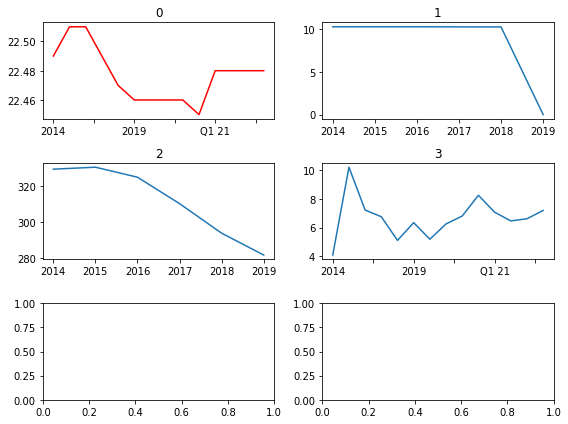

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(8)
df['df_sber'][params[0]].plot(ax=axes[0,0], style='r', label='Series'); axes[0,0].set_title(0)
df['df_sber'][params[1]].plot(ax=axes[0,1]); axes[0,1].set_title(1)
df['df_sber'][params[2]].plot(ax=axes[1,0]); axes[1,0].set_title(2)
df['df_sber'][params[4]].plot(ax=axes[1,1]); axes[1,1].set_title(3)
fig.tight_layout()

In [8]:
!pip install investpy


In [9]:
from investpy.utils.extra import random_user_agent
import investpy

In [10]:
import numpy as np
from math import *
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import seaborn
from datetime import date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
# Параметры которые вводит пользователь (для пользователя будет доступно 3 поля, в которые он может ввести именно эти параметры)
start = '01/01/2020'
end = '26/11/2021'
tickers = ['sber', 'yndx', 'gazp', 'mtss', 'lkoh', 'dsky']

In [12]:
# функция которая будет моделью сайта
def extract_data(start, end, tickers):
  
  dfs = list()

  for k, stock in enumerate(tickers):
      df = investpy.get_stock_historical_data(stock=stock, 
                                              country='russia',
                                              from_date=start,
                                              to_date=end)['Close']

      df = pd.DataFrame(df)
      df1 = df.rename(columns = {'Close': f'{tickers[k]}_Close'}, inplace = False)

      dfs.append(df1)

  max_lenths_of_list_dfs = max(dfs, key=len)
  data = pd.DataFrame(max_lenths_of_list_dfs.index)


  columns = [tickers]
  dfs2 = pd.DataFrame(list(map(np.ravel, dfs)))
  dfs2 = np.transpose(dfs2)
  dfs2.columns = tickers
  dfs2 = pd.concat([dfs2, data], axis = 1)
  dfs2.set_index('Date')
  dfs3 = dfs2.set_index('Date')
  dfs4 = dfs3.dropna()
  return dfs4


dfs4 = extract_data(start, end, tickers)

In [13]:
ticker = "gazp"

In [23]:

date = date.today()
date

datetime.date(2021, 12, 5)

In [109]:
curent_price = dfs4['gazp'][len(dfs4)-1]
curent_price

326.0

In [34]:
pe_ratio = df['df_gazp']['Цена/Прибыль'][len(df)+6] # странно почему длина так получилась в табличке
pe_ratio

7.83

In [108]:
eps_ratio = dfs4['gazp'][len(dfs4)-1] / df['df_gazp']['Цена/Прибыль'][len(df)+6]
eps_ratio

41.63473818646232

In [38]:
discount_rate = 0.09 # доходность альтернативного вложения в стран

In [41]:
Estimated_Profit_Growth_Rate = (df['df_gazp']['Чистая рентабельность %'][len(df)+6] - df['df_gazp']['Чистая рентабельность %'][len(df)+5] + df['df_gazp']['Чистая рентабельность %'][len(df)+5] - df['df_gazp']['Чистая рентабельность %'][len(df)+4])/2
Estimated_Profit_Growth_Rate

2.8249999999999993

In [60]:
Estimated_Profit_Growth_Rate_list = []
for k, i in enumerate(range(len(df)+6)):
  Estimated_Profit_Growth_Rate = df['df_gazp']['Чистая рентабельность %'][k+1] - df['df_gazp']['Чистая рентабельность %'][k]
  Estimated_Profit_Growth_Rate_list.append(Estimated_Profit_Growth_Rate)
Estimated_Profit_Growth_Rate_list
Estimated_Profit_Growth_Rate = sum(Estimated_Profit_Growth_Rate_list)/len(Estimated_Profit_Growth_Rate_list) / 100
Estimated_Profit_Growth_Rate

0.018525

In [58]:
g_factor = 1

In [61]:
growth_duration = 3 # ставить 3-5 лет - гризонт прогнозирования

In [62]:
perpetual_growth_rate = 5/100 # примерна ключая ставка Банка или уровень инфляции

In [76]:
lst_range = list(range(2,11,1))
lst_range

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [96]:
n_1 = eps_ratio * (1 + Estimated_Profit_Growth_Rate)
n_1

42.406021711366535

In [97]:
lst_n2_n10 = []
for k,i in enumerate(range(len(lst_range))):
  if k == 0:
    if lst_range[k] <= growth_duration:
      n_2 = n_1*(1+Estimated_Profit_Growth_Rate)
    else:
      n_2 = n_1*(1+perpetual_growth_rate)
    lst_n2_n10.append(n_2)
  else:
    if lst_range[k] <= growth_duration:
      n_2 = lst_n2_n10[len(lst_n2_n10)-1]*(1+Estimated_Profit_Growth_Rate)
    else:
      n_2 = lst_n2_n10[len(lst_n2_n10)-1]*(1+perpetual_growth_rate)
    lst_n2_n10.append(n_2)
len(lst_n2_n10)

9

In [80]:
terminal_value = lst_n2_n10[len(lst_n2_n10)-1] * (1 + perpetual_growth_rate) / (discount_rate - perpetual_growth_rate)
terminal_value

1624.895063613066

In [81]:
def npv(cfList, r):
    f = 0
    i = 1

    pv = 0

    while f <= len(cfList):
        pv += (cfList[f] / ((1 + r) ** i))
        f += 1
        i += 1
    return pv

In [98]:
lst_n1_n10 = [n_1] + lst_n2_n10
len(lst_n1_n10)


10

In [103]:
def npv(cfList, r):

    sum_pv = 0  # <-- variable used to sum result

    for i, pmt in enumerate(cfList, start=1):  # <-- use of enumerate allows you to do away with the counter variables.
        sum_pv += pmt / ((1 + r) ** i)  # <-- add pv of one of the cash flows to the sum variable

    return sum_pv  # <-- only return the sum after your loop has completed.
intrinsic_value = npv(lst_n1_n10, discount_rate) + terminal_value/((1+discount_rate)**len(lst_n1_n10))
intrinsic_value

1000.9318198370414

In [107]:
curent_price

41.63473818646232

In [111]:
potential_uplift = intrinsic_value/curent_price - 1
potential_uplift

2.070343005635096

In [113]:
Estimated_Long_Term_Return = intrinsic_value/curent_price*discount_rate
Estimated_Long_Term_Return

0.27633087050715865

In [120]:
columns = ['ticker', 'Date', 'EPS', 'Estimated Profit Growth Rate', 'Discount Rate', 'G-Factor', 'Intrinsic Value', 'Current Price', 'Potential Uplift', \
           'Estimated Long Term Return', 'P/E', 'Growth duration, Years','Perpetual Growth Rate','1','2','3','4','5','6','7','8','9','10','Terminal Value']
dcf_watch_list = pd.DataFrame(columns = columns)


,ticker,Date,EPS,Estimated Profit Growth Rate,Discount Rate,G-Factor,Intrinsic Value,Current Price,Potential Uplift,Estimated Long Term Return,P/E,"Growth duration, Years",Perpetual Growth Rate,1,2,3,4,5,6,7,8,9,10,Terminal Value


In [122]:
df2 = {'ticker': ticker, 'Date': date, 'EPS': eps_ratio, 'ticker': ticker, 'Date': date, 'EPS': eps_ratio, 'Estimated Profit Growth Rate':Estimated_Profit_Growth_Rate, 'Discount Rate': discount_rate, \
       'G-Factor':g_factor, 'Intrinsic Value':intrinsic_value, 'Current Price':curent_price, 'Potential Uplift':potential_uplift, \
           'Estimated Long Term Return':Estimated_Long_Term_Return, 'P/E': pe_ratio, 'Growth duration, Years': growth_duration,'Perpetual Growth Rate':perpetual_growth_rate,'1':lst_n1_n10[0],\
       '2': lst_n1_n10[1],'3': lst_n1_n10[2],'4': lst_n1_n10[3],'5':lst_n1_n10[4],'6':lst_n1_n10[5],'7':lst_n1_n10[6],'8':lst_n1_n10[7],'9':lst_n1_n10[8],'10':lst_n1_n10[9],'Terminal Value':terminal_value }

dcf_watch_list = dcf_watch_list.append(df2, ignore_index = True)

dcf_watch_list

,ticker,Date,EPS,Estimated Profit Growth Rate,Discount Rate,G-Factor,Intrinsic Value,Current Price,Potential Uplift,Estimated Long Term Return,P/E,"Growth duration, Years",Perpetual Growth Rate,1,2,3,4,5,6,7,8,9,10,Terminal Value
0,gazp,2021-12-05,41.634738,0.018525,0.09,1,1000.93182,326.0,2.070343,0.276331,7.83,3,0.05,42.406022,43.191593,43.991718,46.191303,48.500869,50.925912,53.472208,56.145818,58.953109,61.900764,1624.895064


In [16]:
def npv(cfList, r):

    sum_pv = 0  # <-- variable used to sum result

    for i, pmt in enumerate(cfList, start=1):  # <-- use of enumerate allows you to do away with the counter variables.
        sum_pv += pmt / ((1 + r) ** i)  # <-- add pv of one of the cash flows to the sum variable

    return sum_pv  # <-- only return the sum after your loop has completed.

date = date.today()

def dcf_watch_list(ticker):



  curent_price = dfs4['gazp'][len(dfs4)-1]

  pe_ratio = df['df_gazp']['Цена/Прибыль'][len(df)+6] # странно почему длина так получилась в табличке

  eps_ratio = dfs4['gazp'][len(dfs4)-1] / df['df_gazp']['Цена/Прибыль'][len(df)+6]

  discount_rate = 0.09 # доходность альтернативного вложения в стран

  Estimated_Profit_Growth_Rate_list = []
  for k, i in enumerate(range(len(df)+6)):
    Estimated_Profit_Growth_Rate = df['df_gazp']['Чистая рентабельность %'][k+1] - df['df_gazp']['Чистая рентабельность %'][k]
    Estimated_Profit_Growth_Rate_list.append(Estimated_Profit_Growth_Rate)
  Estimated_Profit_Growth_Rate = sum(Estimated_Profit_Growth_Rate_list)/len(Estimated_Profit_Growth_Rate_list) / 100

  g_factor = 1

  growth_duration = 3 # ставить 3-5 лет - гризонт прогнозирования

  perpetual_growth_rate = 5/100 # примерна ключая ставка Банка или уровень инфляции

  n_1 = eps_ratio * (1 + Estimated_Profit_Growth_Rate)

  lst_range = list(range(2,11,1))

  lst_n2_n10 = []
  
  for k,i in enumerate(range(len(lst_range))):
    if k == 0:
      if lst_range[k] <= growth_duration:
        n_2 = n_1*(1+Estimated_Profit_Growth_Rate)
      else:
        n_2 = n_1*(1+perpetual_growth_rate)
      lst_n2_n10.append(n_2)
    else:
      if lst_range[k] <= growth_duration:
        n_2 = lst_n2_n10[len(lst_n2_n10)-1]*(1+Estimated_Profit_Growth_Rate)
      else:
        n_2 = lst_n2_n10[len(lst_n2_n10)-1]*(1+perpetual_growth_rate)
      lst_n2_n10.append(n_2)

  terminal_value = lst_n2_n10[len(lst_n2_n10)-1] * (1 + perpetual_growth_rate) / (discount_rate - perpetual_growth_rate)

  lst_n1_n10 = [n_1] + lst_n2_n10

  intrinsic_value = npv(lst_n1_n10, discount_rate) + terminal_value/((1+discount_rate)**len(lst_n1_n10))

  potential_uplift = intrinsic_value/curent_price - 1

  Estimated_Long_Term_Return = intrinsic_value/curent_price*discount_rate


  columns = ['ticker', 'Date', 'EPS', 'Estimated Profit Growth Rate', 'Discount Rate', 'G-Factor', 'Intrinsic Value', 'Current Price', 'Potential Uplift', \
           'Estimated Long Term Return', 'P/E', 'Growth duration, Years','Perpetual Growth Rate','1','2','3','4','5','6','7','8','9','10','Terminal Value']

  dcf_watch_list = pd.DataFrame(columns = columns)

  df2 = {'ticker': ticker, 'Date': date, 'EPS': eps_ratio, 'ticker': ticker, 'Date': date, 'EPS': eps_ratio, 'Estimated Profit Growth Rate':Estimated_Profit_Growth_Rate, 'Discount Rate': discount_rate, \
       'G-Factor':g_factor, 'Intrinsic Value':intrinsic_value, 'Current Price':curent_price, 'Potential Uplift':potential_uplift, \
           'Estimated Long Term Return':Estimated_Long_Term_Return, 'P/E': pe_ratio, 'Growth duration, Years': growth_duration,'Perpetual Growth Rate':perpetual_growth_rate,'1':lst_n1_n10[0],\
       '2': lst_n1_n10[1],'3': lst_n1_n10[2],'4': lst_n1_n10[3],'5':lst_n1_n10[4],'6':lst_n1_n10[5],'7':lst_n1_n10[6],'8':lst_n1_n10[7],'9':lst_n1_n10[8],'10':lst_n1_n10[9],'Terminal Value':terminal_value }

  dcf_watch_list = dcf_watch_list.append(df2, ignore_index = True)

  return dcf_watch_list




dcf_watch_list(ticker)

,ticker,Date,EPS,Estimated Profit Growth Rate,Discount Rate,G-Factor,Intrinsic Value,Current Price,Potential Uplift,Estimated Long Term Return,P/E,"Growth duration, Years",Perpetual Growth Rate,1,2,3,4,5,6,7,8,9,10,Terminal Value
0,gazp,2021-12-05,41.634738,0.018525,0.09,1,1000.93182,326.0,2.070343,0.276331,7.83,3,0.05,42.406022,43.191593,43.991718,46.191303,48.500869,50.925912,53.472208,56.145818,58.953109,61.900764,1624.895064
